## Project 1: Food Safety

## Cleaning and Exploring Data with Pandas

In this project, we investigate restaurant food safety scores for restaurants in San Francisco. The scores and violation information has been [made available by the San Francisco Department of Public Health](https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i). The main goal for this assignment is to walk through the process of Data Cleaning and EDA: 

* Reading simple csv files, 
* Reading Pandas documentation and using Pandas,
* Working with data at different levels of granularity,
* Identifying the type of data collected, missing values, anomalies, etc., and
* Exploring characteristics and distributions of individual variables.

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

#import plotly

from IPython.display import display, Image 
def display_figure_for_grader(fig):
    plotly.io.write_image(fig, 'temp.png')
    display(Image('temp.png'))    

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

In [2]:
from pathlib import Path
data_dir = Path('.')
data_dir.mkdir(exist_ok = True)
file_path = data_dir / Path('data.zip')
dest_path = file_path

In [3]:
!ls

 data   data.zip   pics  'Project 1A.ipynb'  'Project 1.ipynb'


In [4]:
import zipfile
my_zip = zipfile.ZipFile(dest_path, 'r')
list_names = my_zip.namelist()
list_names

['data/',
 'data/bus.csv',
 'data/ins.csv',
 'data/ins2vio.csv',
 'data/vio.csv',
 'data/sf_zipcodes.json',
 'data/legend.csv']

In [5]:
my_zip = zipfile.ZipFile(dest_path, 'r')
for info in my_zip.infolist():
    print('{}\t{}'.format(info.filename, info.file_size))

data/	0
data/bus.csv	665365
data/ins.csv	1860919
data/ins2vio.csv	1032799
data/vio.csv	4213
data/sf_zipcodes.json	474
data/legend.csv	120


In [6]:
data_dir = Path('.')
my_zip.extractall(data_dir)
!ls {data_dir / Path("data")}

bus.csv  ins2vio.csv  ins.csv  legend.csv  sf_zipcodes.json  vio.csv


In [7]:
import os

def head(filename, lines=5):
    """
    Returns the first few lines of a file.
    
    filename: the name of the file to open
    lines: the number of lines to include
    
    return: A list of the first few lines from the file.
    """
    from itertools import islice
    with open(filename, "r") as f:
        return list(islice(f, lines))

data_dir = "./"
for f in list_names:
    if not os.path.isdir(f):
        print(head(data_dir + f, 5), "\n")

['"business id column","name","address","city","state","postal_code","latitude","longitude","phone_number"\n', '"1000","HEUNG YUEN RESTAURANT","3279 22nd St","San Francisco","CA","94110","37.755282","-122.420493","-9999"\n', '"100010","ILLY CAFFE SF_PIER 39","PIER 39  K-106-B","San Francisco","CA","94133","-9999","-9999","+14154827284"\n', '"100017","AMICI\'S EAST COAST PIZZERIA","475 06th St","San Francisco","CA","94103","-9999","-9999","+14155279839"\n', '"100026","LOCAL CATERING","1566 CARROLL AVE","San Francisco","CA","94124","-9999","-9999","+14155860315"\n'] 

['"iid","date","score","type"\n', '"100010_20190329","03/29/2019 12:00:00 AM","-1","New Construction"\n', '"100010_20190403","04/03/2019 12:00:00 AM","100","Routine - Unscheduled"\n', '"100017_20190417","04/17/2019 12:00:00 AM","-1","New Ownership"\n', '"100017_20190816","08/16/2019 12:00:00 AM","91","Routine - Unscheduled"\n'] 

['"iid","vid"\n', '"97975_20190725","103124"\n', '"85986_20161011","103114"\n', '"95754_2019032

## Reading in and Verifying Data

In [8]:
# Path to directory containing data
dsDir = Path('data')

bus = pd.read_csv(dsDir/'bus.csv', encoding='ISO-8859-1')
ins2vio = pd.read_csv(dsDir/'ins2vio.csv')
ins = pd.read_csv(dsDir/'ins.csv')
vio = pd.read_csv(dsDir/'vio.csv')

In [9]:
bus.head()

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


In [10]:
bus['middle_name'] = bus['name'].str.split(" ", expand=True)[1]
bus.groupby('middle_name', as_index = False).count().sort_values(by = "name", ascending=False)['middle_name'].head(10)

546         Coffee
442           Cafe
52               &
1809    Restaurant
2074         Sushi
1415        Market
1702         Pizza
1219       Kitchen
727     ELEMENTARY
409         COFFEE
Name: middle_name, dtype: object

In [11]:
bus['middle_name'] = bus['name'].str.split(" ", expand=True)[1].value_counts()
bus

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,middle_name
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999,NaN
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284,NaN
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839,NaN
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315,NaN
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675,NaN
...,...,...,...,...,...,...,...,...,...,...
6248,99948,SUSIECAKES BAKERY,3509 CALIFORNIA ST,San Francisco,CA,94118,-9999.000000,-9999.000000,14150452253,NaN
6249,99988,HINODEYA SOMA,303 02nd ST STE 102,San Francisco,CA,94107,-9999.000000,-9999.000000,-9999,NaN
6250,99991,TON TON,422 GEARY ST,San Francisco,CA,94102,-9999.000000,-9999.000000,14155531280,NaN
6251,99992,URBAN EXPRESS KITCHENS LLC,475 06th ST,San Francisco,CA,94103,-9999.000000,-9999.000000,14150368085,NaN


In [12]:
display(bus.head())
display(ins.head())

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,middle_name
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999,NaN
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284,NaN
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839,NaN
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315,NaN
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675,NaN


,iid,date,score,type
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup


In [13]:
bus.describe()

,business id column,latitude,longitude,phone_number,middle_name
count,6253.000000,6253.000000,6253.000000,6.253000e+03,0.0
mean,60448.948984,-5575.337966,-5645.817699,4.701819e+09,NaN
std,36480.132445,4983.390142,4903.993683,6.667508e+09,NaN
min,19.000000,-9999.000000,-9999.000000,-9.999000e+03,NaN
25%,18399.000000,-9999.000000,-9999.000000,-9.999000e+03,NaN
50%,75685.000000,-9999.000000,-9999.000000,-9.999000e+03,NaN
75%,90886.000000,37.776494,-122.421553,1.415533e+10,NaN
max,102705.000000,37.824494,0.000000,1.415988e+10,NaN


In [14]:
bus_summary = pd.DataFrame(**{'columns': ['business id column', 'latitude', 'longitude'],
 'data': {'business id column': {'50%': 75685.0, 'max': 102705.0, 'min': 19.0},
  'latitude': {'50%': -9999.0, 'max': 37.824494, 'min': -9999.0},
  'longitude': {'50%': -9999.0,
   'max': 0.0,
   'min': -9999.0}},
 'index': ['min', '50%', 'max']})

ins_summary = pd.DataFrame(**{'columns': ['score'],
 'data': {'score': {'50%': 76.0, 'max': 100.0, 'min': -1.0}},
 'index': ['min', '50%', 'max']})

vio_summary = pd.DataFrame(**{'columns': ['vid'],
 'data': {'vid': {'50%': 103135.0, 'max': 103177.0, 'min': 103102.0}},
 'index': ['min', '50%', 'max']})

from IPython.display import display

print('What we expect from your Businesses dataframe:')
display(bus_summary)
print('What we expect from your Inspections dataframe:')
display(ins_summary)
print('What we expect from your Violations dataframe:')
display(vio_summary)

What we expect from your Businesses dataframe:


,business id column,latitude,longitude
min,19.0,-9999.000000,-9999.0
50%,75685.0,-9999.000000,-9999.0
max,102705.0,37.824494,0.0


What we expect from your Inspections dataframe:


,score
min,-1.0
50%,76.0
max,100.0


What we expect from your Violations dataframe:


,vid
min,103102.0
50%,103135.0
max,103177.0


In [15]:
def df_allclose(actual, desired, columns=None, rtol=5e-2):
    """Compare selected columns of two dataframes on a few summary statistics.
    
    Compute the min, median and max of the two dataframes on the given columns, and compare
    that they match numerically to the given relative tolerance.
    
    If they don't match, an AssertionError is raised (by `numpy.testing`).
    """    
    # Summary statistics to compare on
    stats = ['min', '50%', 'max']
    
    # For the desired values, we can provide a full DF with the same structure as
    # the actual data, or pre-computed summary statistics.
    # We assume a pre-computed summary was provided if columns is None. In that case, 
    # `desired` *must* have the same structure as the actual's summary
    if columns is None:
        des = desired
        columns = desired.columns
    else:
        des = desired[columns].describe().loc[stats]

    # Extract summary stats from actual DF
    act = actual[columns].describe().loc[stats]

    return np.allclose(act, des, rtol)

# Examining the Business Data File

In [16]:
bus.head()

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,middle_name
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999,NaN
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284,NaN
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839,NaN
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315,NaN
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675,NaN


In [17]:
bus = bus.rename(columns={"business id column": "bid"})

In [18]:
bus.head()

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,middle_name
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999,NaN
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284,NaN
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839,NaN
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315,NaN
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675,NaN


In [19]:
is_bid_unique = bus.loc[:, "bid"].unique().all()
is_bid_unique

True

In [20]:
top_names = bus["name"].value_counts().head(5).index
top_addresses = bus["address"].value_counts().head(5).index
top_names, top_addresses

(Index(['Peet's Coffee & Tea', 'Starbucks Coffee', 'McDonald's', 'Jamba Juice',
        'STARBUCKS'],
       dtype='object', name='name'),
 Index(['Off The Grid', '428 11th St', '2948 Folsom St', '3251 20th Ave',
        'Pier 41'],
       dtype='object', name='address'))

<br/><br/><br/>

---

<br/><br/><br/>

# 2: Cleaning the Business Data Postal Codes

The business data contains postal code information that we can use to aggregate the ratings over regions of the city.  Let's examine and clean the postal code field.  The postal code (sometimes also called a [ZIP code](https://en.wikipedia.org/wiki/ZIP_Code)) partitions the city into regions:

<img src="https://www.usmapguide.com/wp-content/uploads/2019/03/printable-san-francisco-zip-code-map.jpg" alt="ZIP Code Map" style="width: 600px">

How many restaurants are in each ZIP code? 

In [21]:
zip_counts = bus.groupby("postal_code").count()
zip_counts

,bid,name,address,city,state,latitude,longitude,phone_number,middle_name
postal_code,,,,,,,,,
-9999,194,194,194,194,194,194,194,194,0
00000,1,1,1,1,1,1,1,1,0
64110,1,1,1,1,1,1,1,1,0
92672,1,1,1,1,1,1,1,1,0
94013,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...
95122,1,1,1,1,1,1,1,1,0
95132,1,1,1,1,1,1,1,1,0
95133,1,1,1,1,1,1,1,1,0


In [22]:
zip_counts = bus.groupby("postal_code").size().sort_values(ascending=False)
print(zip_counts.to_string())

postal_code
94103         562
94110         555
94102         456
94107         408
94133         398
94109         382
94111         259
94122         255
94105         249
94118         231
94115         230
94108         229
94124         218
94114         200
-9999         194
94112         192
94117         189
94123         177
94121         157
94104         142
94132         132
94116          97
94158          90
94134          82
94127          67
94131          49
94130           8
94143           5
94101           2
CA              2
94188           2
94301           2
94013           2
94518           1
95133           1
95132           1
94602           1
94544           1
95122           1
94621           1
95105           1
95109           1
95112           1
95117           1
94901           1
94105-2907      1
64110           1
94120           1
941102019       1
941033148       1
94102-5917      1
941             1
94117-3504      1
94080           1
00000           


We noticed a large number of potentially invalid ZIP codes (e.g., "Ca").  These are likely due to data entry errors.  To get a better understanding of the potential errors in the zip codes we will:

- Import a list of valid San Francisco ZIP codes by using `pd.read_json` to load the file `data/sf_zipcodes.json` and create a **series** of type `str` containing the valid ZIP codes.  
- Construct a `DataFrame` containing only the businesses which DO NOT have valid ZIP codes.

### Part I


In [23]:
valid_zips = pd.read_json('data/sf_zipcodes.json')
valid_zips = valid_zips["zip_codes"].astype('string')

type(valid_zips.dtype)

pandas.core.arrays.string_.StringDtype

### Part II


In [24]:
invalid_zip_bus = bus[~bus["postal_code"].isin(valid_zips)]
invalid_zip_bus.head(20)

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,middle_name
22,100126,Lamas Peruvian Food Truck,Private Location,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999,NaN
68,100417,"COMPASS ONE, LLC",1 MARKET ST. FL,San Francisco,CA,94105-1420,-9999.000000,-9999.000000,14154324000,NaN
96,100660,TEAPENTER,1518 IRVING ST,San Francisco,CA,94122-1909,-9999.000000,-9999.000000,14155868318,NaN
109,100781,LE CAFE DU SOLEIL,200 FILLMORE ST,San Francisco,CA,94117-3504,-9999.000000,-9999.000000,14155614215,NaN
144,101084,Deli North 200,1 Warriors Way Level 300 North East,San Francisco,CA,94518,-9999.000000,-9999.000000,-9999,NaN
156,101129,Vendor Room 200,1 Warriors Way Level 300 South West,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999,NaN
177,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,-9999,-9999.000000,-9999.000000,14150429222,NaN
276,102014,"DROPBOX (Section 3, Floor 7)",1800 Owens St,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999,NaN
295,102245,Vessell CA Operations (#4),2351 Mission St,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999,NaN
298,10227,The Napper Tandy,3200 24th St,San Francisco,CA,-9999,37.752581,-122.416482,-9999,NaN


Many of the businesses had a common invalid postal code that was likely used to encode a MISSING postal code. 

So, we construct a **series** that counts the number of businesses at each `address` that have this single likely MISSING postal code value.  Order the series in descending order by count. 

In [25]:
missing_zip_address_count = bus[bus['postal_code'] == '-9999'].groupby('address')['address'].count().sort_values(ascending=False)
missing_zip_address_count.head()

address
Off The Grid                  39
Off the Grid                  10
OTG                            4
Approved Locations             3
Approved Private Locations     3
Name: address, dtype: int64

_Based on my observations, the restaurants with missing postal codes are mostly in food truck bussinesses. Food truck businesses do not have specific address or location as they move around to find attract its customers. So, that's why they don't have any specific postal codes. Some of them are also a PO BOX and small companies._

Some of the invalid postal codes are just the full 9 digit code rather than the first 5 digits. We create a new column named `postal5` in the original `bus` dataframe which contains only the first 5 digits of the `postal_code` column.

Then, for any of the `postal5` ZIP code entries that were not a valid San Francisco ZIP Code (according to `valid_zips`), the provided code will set the `postal5` value to `None`.  

In [26]:
bus['postal5'] = None
bus['postal5'] = bus['postal_code'].str.slice(stop=5)
...
bus.loc[~bus['postal5'].isin(valid_zips), 'postal5'] = None
# Checking the corrected postal5 column
bus.loc[invalid_zip_bus.index, ['bid', 'name', 'postal_code', 'postal5']]

,bid,name,postal_code,postal5
22,100126,Lamas Peruvian Food Truck,-9999,None
68,100417,"COMPASS ONE, LLC",94105-1420,94105
96,100660,TEAPENTER,94122-1909,94122
109,100781,LE CAFE DU SOLEIL,94117-3504,94117
144,101084,Deli North 200,94518,None
...,...,...,...,...
6173,99369,HOTEL BIRON,94102-5917,94102
6174,99376,Mashallah Halal Food truck Ind,-9999,None
6199,99536,FAITH SANDWICH #2,94105-2907,94105
6204,99681,Twister,95112,None


# 3: Investigate the Inspection Data

Let's start by looking again at the first 5 rows of `ins` to see what we're working with.

In [27]:
ins.head(5)

,iid,date,score,type
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup


In [28]:
is_ins_iid_a_primary_key = ins["iid"].value_counts().all()
is_ins_iid_a_primary_key

True

In [29]:
ins["bid"] = ins["iid"].str.split("_", expand=True)[0].astype(int)
ins.head(5)

,iid,date,score,type,bid
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017


## Question 3b (optional)

In [30]:
sort_bidins = ins["bid"].unique()
sort_bidins.sort()
sort_bidins

array([    19,     24,     31, ..., 102602, 102702, 102705])

In [31]:
sort_bidbus = bus["bid"].unique()
sort_bidbus.sort()
sort_bidbus

array([    19,     24,     31, ..., 102602, 102702, 102705])

In [32]:
comparison = sort_bidins == sort_bidbus
comparison.all()

True

All of restaurants business id in bus dataset appear in 'bid' ins dataset.

**Part I:** What is the type of the individual `ins['date']` entries?

**Part II:** Convert something from it current type to `TimeStamp` would be to use `astype`.

**Part III:** What are the earliest and latest dates in our inspection data?  

**Part IV:** Create an additional `ins['year']` column containing just the year of the inspection.

### Part I


In [33]:
ins_date_type = type(ins['date'][0])
ins_date_type

str

### Part II


In [34]:
ins['timestamp'] = pd.to_datetime(ins['date'])

/tmp/ipykernel_391/3141667887.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ins['timestamp'] = pd.to_datetime(ins['date'])


In [35]:
ins['timestamp']

0       2019-03-29
1       2019-04-03
2       2019-04-17
3       2019-08-16
4       2019-08-26
           ...    
26658   2018-09-24
26659   2018-11-02
26660   2019-09-09
26661   2017-12-07
26662   2018-08-08
Name: timestamp, Length: 26663, dtype: datetime64[ns]

### Part III


In [36]:
earliest_date = ins['timestamp'].min()
latest_date = ins['timestamp'].max()
...
print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)

Earliest Date: 2016-10-04 00:00:00
Latest Date: 2019-11-28 00:00:00


### Part IV


In [37]:
ins['year'] = pd.Series(ins['timestamp']).dt.year

In [38]:
ins.head()

,iid,date,score,type,bid,timestamp,year
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019


<br/><br/><br/>

---

## Question 3d

Let's examine the inspection scores `ins['score']`



In [39]:
ins['score'].value_counts().head()

score
-1      12632
 100     1993
 96      1681
 92      1260
 94      1250
Name: count, dtype: int64

In [40]:
type(ins)

pandas.core.frame.DataFrame

In [41]:
ins['Missing Score'] = (ins['score'] == -1).astype("str")
ins

,iid,date,score,type,bid,timestamp,year,Missing Score
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019,True
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019,True
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019,True
...,...,...,...,...,...,...,...,...
26658,999_20180924,09/24/2018 12:00:00 AM,-1,Routine - Scheduled,999,2018-09-24,2018,True
26659,999_20181102,11/02/2018 12:00:00 AM,-1,Reinspection/Followup,999,2018-11-02,2018,True
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09,2019,False
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07,2017,False


In [42]:
ins['Missing Score'] = (ins['score'] == -1).astype("str")
ins_missing_score_pivot = ins.pivot_table(index='type',
                                          columns='Missing Score',
                                          values='bid',
                                          aggfunc = np.count_nonzero)
ins_missing_score_pivot = ins_missing_score_pivot.fillna(0).astype(int)
ins_missing_score_pivot['Total'] = ins_missing_score_pivot.sum(axis=1)
ins_missing_score_pivot.sort_values(by="Total", inplace=False, ascending=False)

Missing Score,False,True,Total
type,,,
Routine - Unscheduled,14031,46,14077
Reinspection/Followup,0,6439,6439
New Ownership,0,1592,1592
Complaint,0,1458,1458
New Construction,0,994,994
Non-inspection site visit,0,811,811
New Ownership - Followup,0,499,499
Structural Inspection,0,394,394
Complaint Reinspection/Followup,0,227,227


# Joining Data Across Tables

In [43]:
ins = ins[ins["score"] > 0]

In [44]:
ins

,iid,date,score,type,bid,timestamp,year,Missing Score
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False
15,100041_20190520,05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20,2019,False
20,100055_20190425,04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25,2019,False
21,100055_20190912,09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12,2019,False
...,...,...,...,...,...,...,...,...
26654,999_20170714,07/14/2017 12:00:00 AM,77,Routine - Unscheduled,999,2017-07-14,2017,False
26656,999_20180123,01/23/2018 12:00:00 AM,80,Routine - Unscheduled,999,2018-01-23,2018,False
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09,2019,False
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07,2017,False


In [45]:
bus

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,middle_name,postal5
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999,NaN,94110
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284,NaN,94133
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839,NaN,94103
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315,NaN,94124
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675,NaN,94124
...,...,...,...,...,...,...,...,...,...,...,...
6248,99948,SUSIECAKES BAKERY,3509 CALIFORNIA ST,San Francisco,CA,94118,-9999.000000,-9999.000000,14150452253,NaN,94118
6249,99988,HINODEYA SOMA,303 02nd ST STE 102,San Francisco,CA,94107,-9999.000000,-9999.000000,-9999,NaN,94107
6250,99991,TON TON,422 GEARY ST,San Francisco,CA,94102,-9999.000000,-9999.000000,14155531280,NaN,94102
6251,99992,URBAN EXPRESS KITCHENS LLC,475 06th ST,San Francisco,CA,94103,-9999.000000,-9999.000000,14150368085,NaN,94103


In [46]:
ins_named = pd.merge(left = ins, right = bus)
ins_named.head()

,iid,date,score,type,bid,timestamp,year,Missing Score,name,address,city,state,postal_code,latitude,longitude,phone_number,middle_name,postal5
0,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.0,-9999.0,14154827284,NaN,94133
1,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.0,-9999.0,14155279839,NaN,94103
2,100041_20190520,05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20,2019,False,UNCLE LEE CAFE,3608 BALBOA ST,San Francisco,CA,94121,-9999.0,-9999.0,-9999,NaN,94121
3,100055_20190425,04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25,2019,False,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999.0,-9999.0,14155300260,NaN,94118
4,100055_20190912,09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12,2019,False,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999.0,-9999.0,14155300260,NaN,94118


In [47]:
twenty_lowest_scoring = ins_named.groupby('bid').agg({'name':'first','score':'median'}).rename(columns={'score':'median score'})
twenty_lowest_scoring = twenty_lowest_scoring.sort_values(by=["median score"], ascending=True).head(20)
twenty_lowest_scoring

,name,median score
bid,,
84590,Chaat Corner,54.0
90622,Taqueria Lolita,57.0
94351,VBowls LLC,58.0
69282,New Jumbo Seafood Restaurant,60.5
1154,SUNFLOWER RESTAURANT,63.5
39776,Duc Loi Supermarket,64.0
69397,Minna SF Group LLC,64.0
93150,Chez Beesen,64.0
93502,Smoky Man,64.0


In [48]:
worst_restaurant = ins_named.sort_values('score').reset_index()['name'][0]
worst_restaurant

'Lollipot'

In [49]:
# perfrom a filtering to tell whether or not this restaurant
# had a better score during its next inspection. 

ins_named[ins_named['name'] == "Lollipot"] # SOLUTION

,iid,date,score,type,bid,timestamp,year,Missing Score,name,address,city,state,postal_code,latitude,longitude,phone_number,middle_name,postal5
10897,86718_20161116,11/16/2016 12:00:00 AM,90,Routine - Unscheduled,86718,2016-11-16,2016,False,Lollipot,890 Taraval St,San Francisco,CA,94116,-9999.0,-9999.0,14155818962,NaN,94116
10898,86718_20180522,05/22/2018 12:00:00 AM,45,Routine - Unscheduled,86718,2018-05-22,2018,False,Lollipot,890 Taraval St,San Francisco,CA,94116,-9999.0,-9999.0,14155818962,NaN,94116
10899,86718_20181005,10/05/2018 12:00:00 AM,90,Routine - Unscheduled,86718,2018-10-05,2018,False,Lollipot,890 Taraval St,San Francisco,CA,94116,-9999.0,-9999.0,14155818962,NaN,94116


# Explore Inspection Scores

In this part we explore some of the basic inspection score values visually.

In [50]:
data = ins_named.groupby("score", as_index=True).agg("count").reset_index()
data = data.iloc[:, 0:2]
x = data['score']
y = data['iid']

Text(0.5, 1.0, 'Distribution of Inspection Scores')

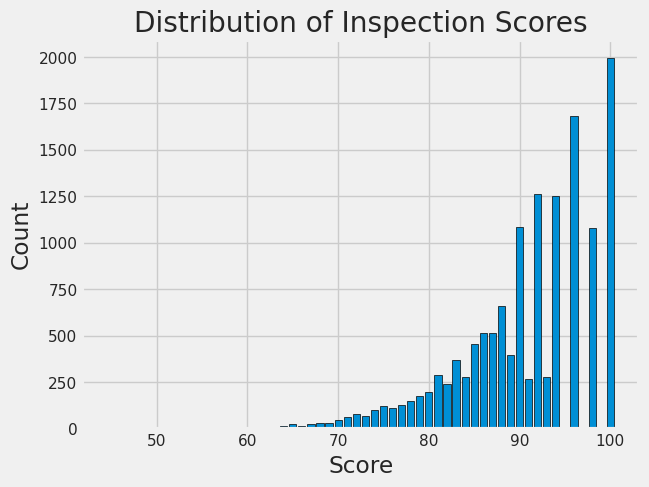

In [51]:
plt.bar(x,y, edgecolor = 'black')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Inspection Scores')

# Restaurant Ratings Over Time

Let's consider various scenarios involving restaurants with multiple ratings over time.



In [52]:
def swing(data):
    if len(data) >= 3:
        return max(data) - min(data)
swing_data = ins_named[['bid','score']]
swing_data = swing_data.groupby('bid', as_index=False).agg(swing).sort_values("score", ascending = False).dropna()
swing_data

,bid,score
4122,86718,45.0
2504,66961,36.0
3601,81674,34.0
3451,80242,33.0
3281,78220,33.0
...,...,...
3143,76574,0.0
3181,77004,0.0
3213,77543,0.0
3377,79346,0.0


In [53]:
max_swing = ins_named[ins_named["bid"] == swing_data.iloc[0,0]].reset_index()
max_swing = max_swing.loc[0]['name']
max_swing

'Lollipot'

What's the relationship between the first and second scores for the businesses with 2 inspections in a year? Do they typically improve? What can we say about restaurants that initially failed? For simplicity, let's focus on only 2018 for this problem, using the `ins2018` DataFrame that will be created for you below.

In the following cell, we create a DataFrame called `scores_pairs_by_business` indexed by `bid` (containing only businesses with exactly 2 inspections in 2018). This DataFrame contains the field score_pair consisting of the score pairs ordered chronologically: `[first_score, second_score]`.

In [54]:
ins2018 = ins[ins['year'] == 2018]

two_score_businesses = (ins2018.sort_values('date')
                            .loc[:, ['bid', 'score']]
                            .groupby('bid')
                            .filter(lambda group: len(group)==2)
                       )

first_scores = two_score_businesses.groupby("bid").first()
second_scores = two_score_businesses.groupby("bid").last()

scores = pd.merge(first_scores, second_scores, on = "bid") \
                        .rename(columns = {"score_x": "first score",
                                           "score_y": "second score"})                                                    

scores

,first score,second score
bid,,
48,94,87
66,98,98
146,81,90
184,90,96
273,83,84
...,...,...
95621,100,100
95628,75,75
95674,100,96


Now let's make a scatter plot to display these pairs of scores. Include on the plot a reference line with slope 1 and y-intercept 0. Since restaurant scores bottom out at 45 points, we'll only focus on ratings between 45 and 100.


Text(0.5, 1.0, 'First Inspection Score vs. Second Inspection Score')

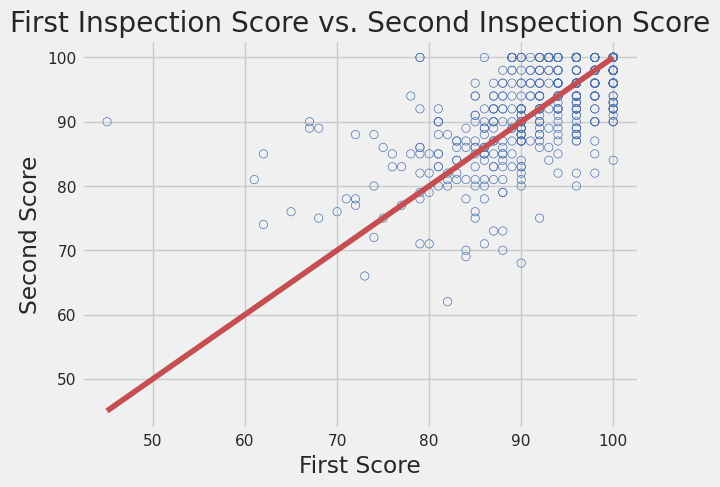

In [55]:
x = scores['first score']
y = scores['second score']
plt.scatter(x, y, facecolors='none', edgecolors='b')
plt.plot([45,100], [45,100], color = 'r')

plt.xlabel('First Score')
plt.ylabel('Second Score')
plt.title('First Inspection Score vs. Second Inspection Score')

_The slope represents scores when the first and the second inspection's scores are the same. When the second inspection's score are higher than the first score, the plot will lie above the slope and vice versa. The scatter plot based on the data set above shows that the number of restaurant that got a higher score than the first one are almost the same (maybe higher) than restaurants who scores worse than the first inspection. That being said, we can not rely on our expectations as many restaurants (half or more) listed in the data set failed to improve their second inspection's score._

## Summary of Inspections Data

- We found that the records are at the inspection level and that we have inspections for multiple years.
- We also found that many restaurants have more than one inspection a year.
- By joining the business and inspection data, we identified the name of the restaurant with the worst rating.
- We identified the restaurant that had the largest swing in rating over time.
- We also examined the change of scores over time! Many restaurants are not actually doing better.